In [91]:
import pandas as pd
import numpy as np
data = pd.read_csv("googleplaystore.csv")

In [37]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
def rule_rating(row):
    if row["Rating"] >=4:
        return "High"
    elif 2 < row["Rating"] <4:
        return "Medium"
    else:
        return "Low"

In [39]:
data["Rating_label"] = data.apply(rule_rating, axis=1)

In [40]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_label
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


<Axes: >

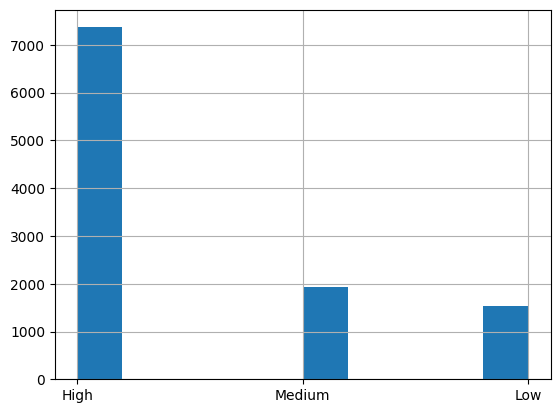

In [41]:
data["Rating_label"].hist()

In [42]:
################################

In [43]:
data = pd.read_csv("tweets.csv", engine='python', encoding="utf-8", on_bad_lines="skip")

In [44]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [45]:
subset = data.sample(frac=0.1)

In [46]:
subset.to_csv("part_tweets.csv", index=False)

In [47]:
#######################################

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [136]:
reviews = pd.read_csv('movie.csv', engine='python', encoding="utf-8", on_bad_lines="skip")

In [137]:
reviews.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


<Axes: >

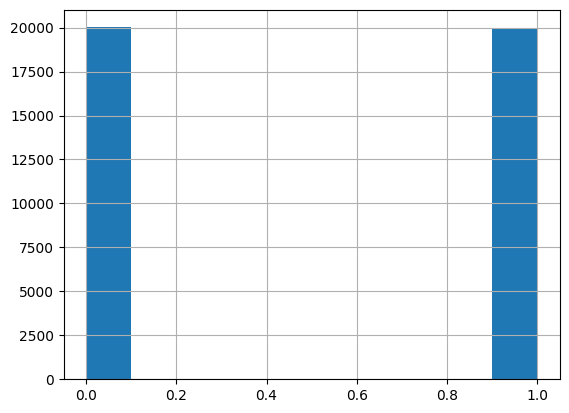

In [139]:
reviews['label'].hist()

In [140]:
reviews = shuffle(reviews)

In [141]:
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=42)

In [142]:
labeled_reviews.head()

,text,label
18493,if you get the slight enjoyment out of pink Fl...,1
15085,Really touching story of a recruitment camp in...,1
32321,Some people say the pace of this film is a lit...,1
2523,Reporter Kimberly Wells presents the minor sid...,1
876,Logged on to the imdb to say what a charming f...,1


In [143]:
unlabeled_reviews.head()

,text,label
20091,Tim Meadows has to be the most underrated of S...,1
13924,Definitely at the top five of best John Garfie...,1
35877,This is a good example of how NOT to make a fi...,0
14297,In Canadian director Kari Skogland's film adap...,1
23032,"One of, if not the worst film to come out of B...",0


In [144]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_reviews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['text'])
    y = labeled_reviews['label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [145]:
model, vectorizer = train_model(labeled_reviews)

In [146]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [147]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [148]:
uncertainty

array([0.99267763, 0.8822356 , 0.47941844, ..., 0.98934107, 0.9500582 ,
       0.76677474])

In [149]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [150]:
labeled_reviews_new

,text,label
27881,"I would have given it a one instead of a two, ...",0
21449,"Terrible acting, lame plot, stupid story and j...",0
7604,This is just the same old crap that is spewed ...,0
30895,I'd give this a negative rating if I could. I ...,0
2825,I can't believe it that was the worst movie i ...,0
...,...,...
27409,"This film was bad. Bad acting, bad directing, ...",0
24760,Talk about rubbish! I can't think of one good ...,0
5951,(Contains really bad Spoilers) So what can I s...,0
11924,One of two movies I have actually thought abou...,0


In [151]:
unlabeled_reviews_new

,text,label
3404,<br /><br />This movie sucked! The first one w...,0
31148,"Budget, decent actors ...who knew these things...",0
12660,This film is in a dead tie with the original f...,0
36408,"This movie is just downright horrible, the mov...",0
31570,"This was pretty bad - from bad acting, bad tec...",0
...,...,...
803,Full marks for Pacino's rendering of the speec...,1
395,"Somewhere, on this site, someone wrote that to...",0
30733,"The (DVD)movie ""The Tempest"", directed by Jack...",0
35011,Although I am generally a proponent of the wel...,0


In [152]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [153]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_reviews)

In [157]:
reviews_test = unlabeled_reviews
reviews_test

,text,label
20091,Tim Meadows has to be the most underrated of S...,1
13924,Definitely at the top five of best John Garfie...,1
35877,This is a good example of how NOT to make a fi...,0
14297,In Canadian director Kari Skogland's film adap...,1
23032,"One of, if not the worst film to come out of B...",0
...,...,...
29812,"This movie is a bizarre fantasy tale, that I'm...",0
18081,Uncle Fred Olen Ray once again gives us a litt...,0
17489,This is one of the worst movies I have seen th...,0
21753,I especially liked the ending of this movie--I...,1


In [159]:
x_test = vectorizer.transform(reviews_test['text'])
y_test_predicted = model.predict(x_test)
y_test_predicted


#print(f1)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [160]:
f1 = f1_score(reviews_test['label'], y_test_predicted)


In [161]:
f1

0.8722752991373713

In [162]:
print(f1)

0.8722752991373713
